In [584]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

### Constructing the Dataset

In [585]:
X = np.arange(0,150,0.25)

linear = 7*X+3
square = X**2
quad = 3*X**2 + X + 7
cube = X**3
cubic = X**3 + 3 * X**2 + 7 * X + 11
exp = 2**(X/3)
linear_str = "7*X+3"
square_str = "X**2"
quad_str = "3*X**2 + X + 7"
cube_str = "X**3"
cubic_str = "X**3 + 3 * X**2 + 7 * X + 11"
exp_str = "2**(X/3)"

df = pd.DataFrame({
    "X":X,
    "linear":linear,
    "square":square,
    "quad":quad,
    "cube":cube,
    "cubic":cubic,
    "exp":exp
})

df

,X,linear,square,quad,cube,cubic,exp
0,0.00,3.00,0.0000,7.0000,0.000000e+00,1.100000e+01,1.000000e+00
1,0.25,4.75,0.0625,7.4375,1.562500e-02,1.295312e+01,1.059463e+00
2,0.50,6.50,0.2500,8.2500,1.250000e-01,1.537500e+01,1.122462e+00
3,0.75,8.25,0.5625,9.4375,4.218750e-01,1.835938e+01,1.189207e+00
4,1.00,10.00,1.0000,11.0000,1.000000e+00,2.200000e+01,1.259921e+00
...,...,...,...,...,...,...,...
595,148.75,1044.25,22126.5625,66535.4375,3.291326e+06,3.358758e+06,8.434719e+14
596,149.00,1046.00,22201.0000,66759.0000,3.307949e+06,3.375606e+06,8.936273e+14
597,149.25,1047.75,22275.5625,66982.9375,3.324628e+06,3.392510e+06,9.467652e+14
598,149.50,1049.50,22350.2500,67207.2500,3.341362e+06,3.409471e+06,1.003063e+15


In [586]:
df.shape

(600, 7)

In [587]:
df.corr()

,X,linear,square,quad,cube,cubic,exp
X,1.000000,1.000000,0.968145,0.968280,0.916346,0.917723,0.403950
linear,1.000000,1.000000,0.968145,0.968280,0.916346,0.917723,0.403950
square,0.968145,0.968145,1.000000,1.000000,0.986002,0.986589,0.507047
quad,0.968280,0.968280,1.000000,1.000000,0.985920,0.986509,0.506860
cube,0.916346,0.916346,0.986002,0.985920,1.000000,0.999994,0.583662
cubic,0.917723,0.917723,0.986589,0.986509,0.999994,1.000000,0.582206
exp,0.403950,0.403950,0.507047,0.506860,0.583662,0.582206,1.000000


### Experiments:

1. Compare XGBoost vs Linear Regression for different curves
1. Predict everything from everything else one at a time.
1. Predict everything from everything else.

### Outputs

1. Correlation data
1. Scatter Plots
2. Sort and Line Plots
3. RMSE
4. Histogram
5. Overfitting and Underfitting stats

## Rough Work

### Working with Square curve

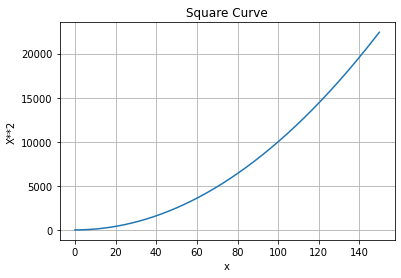

In [588]:
X = df[["X"]]
y = df["square"]

plt.plot(X,y)
plt.title("Square Curve")
plt.xlabel("x")
plt.ylabel(square_str)
plt.grid()

### Train Test Split

In [589]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=420,train_size=0.8)

In [590]:
print(X_train.shape,X_valid.shape)

(480, 1) (120, 1)


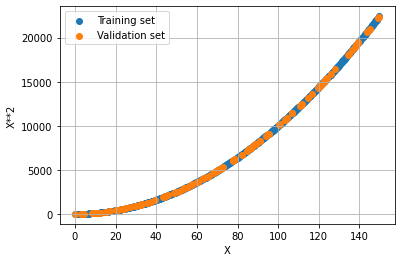

In [591]:
plt.scatter(X_train,y_train,label="Training set")
plt.scatter(X_valid,y_valid,label="Validation set")

plt.grid()
plt.legend()
plt.xlabel("X")
plt.ylabel(square_str)
plt.show()

### XGB: Using X as a feature

In [592]:
regressor = xgb.XGBRegressor()
regressor.fit(X,y,eval_set=[(X_train,y_train),(X_valid,y_valid)])

[0]	validation_0-rmse:7167.79327	validation_1-rmse:6837.73947
[1]	validation_0-rmse:5066.06987	validation_1-rmse:4877.42363
[2]	validation_0-rmse:3588.40654	validation_1-rmse:3441.75846
[3]	validation_0-rmse:2543.19358	validation_1-rmse:2435.88666
[4]	validation_0-rmse:1803.35806	validation_1-rmse:1739.90191
[5]	validation_0-rmse:1282.89831	validation_1-rmse:1244.48794
[6]	validation_0-rmse:915.47379	validation_1-rmse:897.12393
[7]	validation_0-rmse:657.09202	validation_1-rmse:654.77651
[8]	validation_0-rmse:476.03689	validation_1-rmse:483.60363
[9]	validation_0-rmse:350.29480	validation_1-rmse:364.12750
[10]	validation_0-rmse:263.04793	validation_1-rmse:277.19898
[11]	validation_0-rmse:200.94134	validation_1-rmse:208.31917
[12]	validation_0-rmse:159.97643	validation_1-rmse:164.28047
[13]	validation_0-rmse:130.38361	validation_1-rmse:130.02939
[14]	validation_0-rmse:111.03110	validation_1-rmse:105.96691
[15]	validation_0-rmse:97.90048	validation_1-rmse:89.71191
[16]	validation_0-rmse:8

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### RMSE

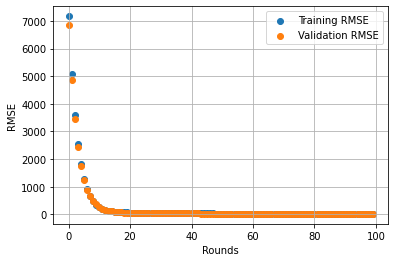

In [593]:
eval_results = regressor.evals_result()

rounds = range(len(eval_results["validation_0"]["rmse"]))

plt.scatter(rounds,eval_results["validation_0"]["rmse"],label="Training RMSE")
plt.scatter(rounds,eval_results["validation_1"]["rmse"],label="Validation RMSE")

plt.grid()
plt.legend()
plt.xlabel("Rounds")
plt.ylabel("RMSE")
plt.show()

### Predicting Complete Data Set

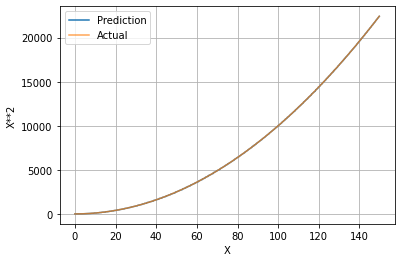

In [594]:
y_pred = regressor.predict(X)

plt.plot(X,y_pred,label="Prediction")
plt.plot(X,y,label="Actual",alpha=0.7)

plt.grid()
plt.legend()
plt.xlabel("X")
plt.ylabel(square_str)
plt.show()

In [595]:
for i in np.random.randint(0,len(y),5):
    print(f"Actual: {y[i]}, Prediction: {y_pred[i]}, diff: {y[i]-y_pred[i]}")

Actual: 4356.0, Prediction: 4368.421875, diff: -12.421875
Actual: 17556.25, Prediction: 17532.8984375, diff: 23.3515625
Actual: 0.0625, Prediction: 2.157797336578369, diff: -2.095297336578369
Actual: 15500.25, Prediction: 15481.30078125, diff: 18.94921875
Actual: 16320.0625, Prediction: 16355.0322265625, diff: -34.9697265625


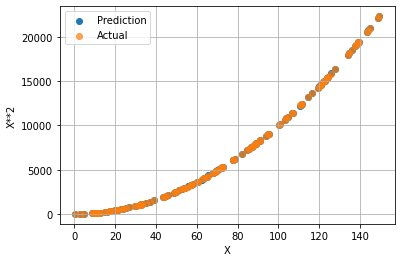

In [596]:
y_pred = regressor.predict(X_valid)

plt.scatter(X_valid,y_pred,label="Prediction")
plt.scatter(X_valid,y_valid,label="Actual",alpha=0.7)

plt.grid()
plt.legend()
plt.xlabel("X")
plt.ylabel(square_str)
plt.show()

In [597]:
y_valid.reset_index(drop=True,inplace=True)
y_diff=y_valid-y_pred
for i in np.random.randint(0,len(y_valid),5):
    print(f"Actual: {y_valid[i]}, Prediction: {y_pred[i]}, diff: {y_diff[i]}")

Actual: 4624.0, Prediction: 4582.453125, diff: 41.546875
Actual: 4323.0625, Prediction: 4368.421875, diff: -45.359375
Actual: 15314.0625, Prediction: 15338.9482421875, diff: -24.8857421875
Actual: 18157.5625, Prediction: 18150.80859375, diff: 6.75390625
Actual: 8281.0, Prediction: 8277.1552734375, diff: 3.8447265625


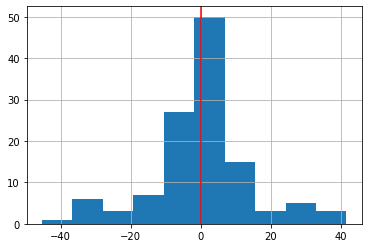

In [598]:
plt.hist(y_diff)
plt.axvline(color="r")
plt.grid()
plt.show()

In [599]:
overpredictions = (y_diff>0).sum()
underpredictions = len(y_diff) - overpredictions

print(f"Over Predictions: {overpredictions}")
print(f"Under Predictions: {underpredictions}")


Over Predictions: 66
Under Predictions: 54
